In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
def load_data(filename, name, start, stop):
    df = pd.read_csv(filename, parse_dates= [["date", "time"]]).rename(columns={"date_time":"date"}).set_index("date", drop=True)
    df = df.resample("10T").mean().interpolate(method="linear")
    df = df[(df.index >= start) & (df.index < stop)]
    df = df.rename(columns={"value":name})
    print("Filename:", filename)
    print(df.shape, df.iloc[0], df.iloc[-1])
    print()
    return df

def uncumulate(df):
    df = df.diff()
    return df.fillna(df.iloc[1,0])

In [19]:
start = datetime(2021, 3, 9)
stop = datetime(2021, 3, 16)

filenames = ["./air_temp.csv", "./elspec_active_import.csv", "./GHI.csv", "./P1P2_active.csv", "./P2_active.csv", "./P2_load_import.csv", "./PV_export.csv", "./SOC.csv", "./wind_speed.csv"]
column_names = ["airTemp","elspec", "GHI", "L", "L2_active", "L2_import", "PV", "SOC","Wind_speed"]
air_temp, elspec, GHI, P1P2, P2, P2_import, PV, SOC, wind_speed = [load_data(filenames[i], column_names[i], start, stop) for i in range(len(filenames))]

P2_import = uncumulate(P2_import)
PV = uncumulate(PV)

Filename: ./air_temp.csv
(1008, 1) airTemp   -5.5
Name: 2021-03-09 00:00:00, dtype: float64 airTemp    1.5
Name: 2021-03-15 23:50:00, dtype: float64

Filename: ./elspec_active_import.csv
(1008, 1) elspec    181110.393519
Name: 2021-03-09 00:00:00, dtype: float64 elspec    216840.131944
Name: 2021-03-15 23:50:00, dtype: float64

Filename: ./GHI.csv
(1008, 1) GHI    2.967105
Name: 2021-03-09 00:00:00, dtype: float64 GHI    4.770833
Name: 2021-03-15 23:50:00, dtype: float64

Filename: ./P1P2_active.csv
(1008, 1) L    138.505572
Name: 2021-03-09 00:00:00, dtype: float64 L    117.804629
Name: 2021-03-15 23:50:00, dtype: float64

Filename: ./P2_active.csv
(1008, 1) L2_active    13.994041
Name: 2021-03-09 00:00:00, dtype: float64 L2_active    11.600739
Name: 2021-03-15 23:50:00, dtype: float64

Filename: ./P2_load_import.csv
(1008, 1) L2_import    914213.546196
Name: 2021-03-09 00:00:00, dtype: float64 L2_import    916726.440789
Name: 2021-03-15 23:50:00, dtype: float64

Filename: ./PV_export

In [22]:

df = pd.concat([air_temp, elspec, GHI, P1P2, P2, P2_import, PV, SOC, wind_speed], axis =1)

df.to_csv("../../src/data/09.03_cleaned.csv")

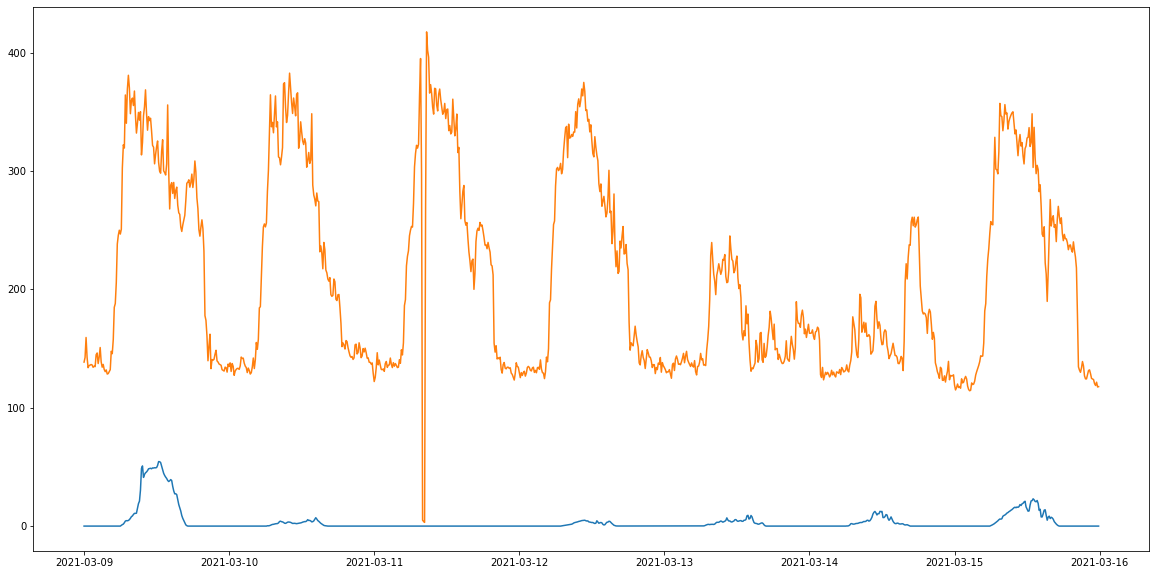

In [5]:
plt.figure(figsize=(20,10))
plt.plot(PV)
plt.plot(P1P2)
plt.show()

In [21]:
df

,airTemp,elspec,GHI,L,L2_active,L2_import,PV,SOC,Wind_speed
date,,,,,,,,,
2021-03-09 00:00:00,-5.500000,181110.393519,2.967105,138.505572,13.994041,2.300395,0.005670,66.661109,0.000000
2021-03-09 00:10:00,-5.700000,181134.951389,3.039474,142.375976,13.271747,2.300395,0.005670,66.659998,1.400000
2021-03-09 00:20:00,-5.650000,181160.808293,3.111842,159.301866,13.903135,2.302866,0.005670,66.685711,1.116667
2021-03-09 00:30:00,-5.900000,181187.031829,3.184211,142.630368,13.465312,2.305089,0.005670,66.682038,0.833333
2021-03-09 00:40:00,-5.733333,181210.630208,3.256579,133.793659,13.867763,2.252841,0.005670,66.678365,0.750000
...,...,...,...,...,...,...,...,...,...
2021-03-15 23:10:00,2.275000,216757.575231,4.743056,120.298162,11.705637,1.993257,0.002056,59.656250,1.500000
2021-03-15 23:20:00,2.250000,216778.398438,4.750000,118.773361,12.028294,1.947368,0.002056,59.647619,1.600000
2021-03-15 23:30:00,2.200000,216798.841435,4.756944,121.559384,12.145766,1.993750,0.002056,59.650000,0.833333
